---

##  Quantum Fourier Transform: Introductory Remarks

_course: quantum cryptography for beginners
<br>date: 28 november 2024
<br>author: burton rosenberg_

---


In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

import math
import numpy as np
import matplotlib.pyplot as plt



qiskit version: 1.1.2



### The discrete fourier transform

The Vandermond matrix is defined for values or indeterminants $x_0,\ldots,x_{n-1}$ as,

$$
\begin{pmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^{n-1}\\
1 & x_1 & x_1^2 & \ldots & x_1^{n-1}\\
 & & \ldots & \\
1 & x_{n-1} & x_{n-1}^2 & \ldots & x_{n-1}^{n-1}\\
\end{pmatrix}
$$

When evaluated on a sequence derived from $n$-th root of unity $\omega_n = e^{2\pi i/n}$, $$x_i = \omega_n^i$$
and normalized by a factor of $1/\sqrt{n}$ it is the matrix for the discrete fourier transform, concieved by Joseph Fourier in about 1822 to solve a problem in heat flow

$$
\mathcal{D}_n = 
\frac{1}{\sqrt{n}}\,
\bigl [\,
\omega_n{}^{r\,c}\,
\bigr ]
$$

where $r=0,1,\ldots,n-1$ is the row index and $c=0,1,\ldots,n-1$ is the column index. My use of the square brackets is to suggest that the picture is not of the matrix but of a generator for the matrix, with the prescription for the $(r, c)$ entry.

Here is an example for $n=4$,

$$
\mathcal{D}_4 = 
\frac{1}{2}\,
\begin{pmatrix}
1 & 1 & 1  & 1\\
1 & i  & -1  & -i\\
1 & -1  &  1  & -1\\
1 & -i  & -1 & 1\\
\end{pmatrix}
$$

### Special cases

In the case of $n$ being an odd prime $p$ and evaluated at $\omega_p$  this is called the Schur Matrix after [Issai Schur](https://en.wikipedia.org/wiki/Issai_Schur). 

In the case of $n=2$ and evaluated at $\omega_2=-1$, we have the Hadamard matrix,

$$
\mathcal{D}_2 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\ 1 & -1 
\end{pmatrix}
$$

The $d$-th tensor of the Hadamard $H^{\otimes d}$ is the Walsh transform, fundamental to the Berstein-Vazirani algorithm.

### The $n$-th roots of unity

Finding all the roots of,
$$
x^n-1 = 0
$$

over the complex numbers $\mathbb{C}$ gives the $n$-roots of unity. Evaluting shows that among the solutions are $\omega_n^i$ for $i=0,1,\ldots,n-1$ and therefore these are all the solutions (to avoid the equation having too many roots). Since $1$ is a root, the equation is divisible by $x-1$, and in fact,

$$
\omega^n-1 = (\omega-1)(\omega^{n-1}+\omega^{n-2}+\ldots+1) = 0
$$

From this we determine that with the exception $n=1$, the sum of all distinct $n$-th roots of unity is zero.

This can be visualized by plotting the $n$-th roots of unity, and seeing they are always evenly distributed around 
the circle, so their sum is zero.



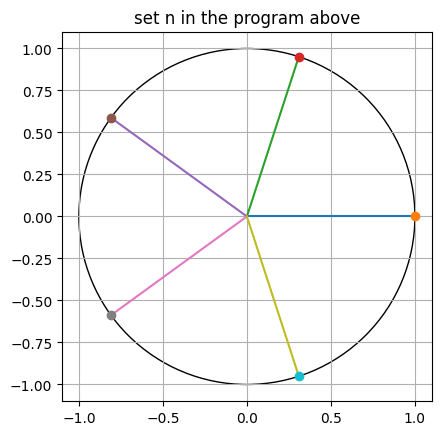

In [2]:
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
axes = plt.gca()
axes.set_aspect(1.0)
plt.gca().add_patch(plt.Circle((0,0),1.0,edgecolor='k',fill=False))

n = 5
for i in range(n):
    phi = i * 2*np.pi/n
    plt.plot([0,math.cos(phi)], [0,math.sin(phi)])
    plt.plot(math.cos(phi), math.sin(phi), 'o')

plt.title("set n in the program above")
plt.show()

### Eigenvalues of $\mathcal{D}_n$.

We show that $\mathcal{D}_n{}^4= 1$. 

\begin{eqnarray*}
\mathcal{D}_n{}^2 &=& \frac{1}{n}\bigl [\,
\omega_n{}^{r\,c}\,
\bigr ]
\, \bigl [\,
\omega_n{}^{r\,c}\,
\bigr ] 
=  \frac{1}{n}\bigl [\, \sum_k \omega_n{}^{rk}\,\omega_n{}^{kc}
\,
\bigr ]\\
&=&  \frac{1}{n}\bigl [\, \sum_k \omega_n{}^{k(r+c)}\,\bigr ] 
=  \frac{1}{n}\bigl [\, n\,\delta(r+c\bmod n)\,\bigr ]  \\
&=& \begin{bmatrix}
1 & \begin{matrix} 0 & \ldots & 0 \end{matrix} \\
\begin{matrix} 0 \\ \vdots \\ 0 \end{matrix} & 
{\huge\tilde 1} \\ 
\end{bmatrix}
\end{eqnarray*}

where $\delta$ is the indicator function for zero and
$\tilde{1}$ is the reverse identy. 

Since $\tilde{1}^2= 1$, by block matrix computation we have $\mathcal{D}_n{}^4= 1$. 
 That means the eigenvalues of $\mathcal{D}_n$ are from among the values $-1,1, i$ and $-i$. 

A very similar calculation will varify that,

$$
\frac{1}{n}\bigl [\,
\omega_n{}^{r\,c}\,
\bigr ]
\, \bigl [\,
\omega_n{}^{-r\,c}\,
\bigr ] = 
 \frac{1}{n}\bigl [\, \sum_k \omega_n{}^{k(r-c)}\,\bigr ] 
=  \frac{1}{n}\bigl [\, n\,\delta(r-c\bmod n)\,\bigr ] = {\large 1}
$$
giving us the inverse of $\mathcal{D}_n$,

$$
\mathcal{D}_n^{-1} =  \frac{1}{\sqrt{n}}\bigl [\,\omega_n{}^{-r\,c}\,\bigr ].
$$

### Eigenvectors of $\mathcal{D}_n$.

A matrix is diagonalizable if its minimal polynomial factors into distinct linear factors. We now have an overestimate of what those linear factors are, so a universal minimal polynomial for a diagnoalizable matrix with all those factors is,

$$
(A+1)(A-1)(A+i)(A-i)=A^4-1
$$

Which we have proved for $A=\mathcal{D}_n$. Hence for any $n$ the matrix has sufficient eigenvectors to be diagonalizable.

#### References

- [IBM QFT notebook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb)

In [3]:
import cmath 
np.set_printoptions(precision=1)


def fft(n):
    vdm = np.zeros((n,n),dtype=np.complex64)
    w = cmath.exp(2j*math.pi/n)
    for r in range(n): 
        for c in range(n):
            vdm[r][c] = w**(r*c)
    vdm = (1.0/np.sqrt(n))*vdm
    return vdm

N = 21
print('  n   1   -1  i  -i  det')
print('+---+---+---+---+---+---+')
for n in range(2,N): 
    e = np.linalg.eig(fft(n))
    e_vals = [0]*4
    vals = [1,-1,1j,-1j]
    for ev in e.eigenvalues:
        for i in range(len(vals)):
            if np.isclose(ev,vals[i]):
                e_vals[i] += 1
    det = (-1)**e_vals[1] * (1j)**e_vals[2] * (-1j)**e_vals[3]
    for (a,b) in [(1,' 1'),(-1,'-1'),(1j,' i'),(-1j,'-i')]:
        if np.isclose(a,det):
            s = b
            break 
            
    print(f' {n:2}   {e_vals[0]}   {e_vals[1]}   {e_vals[2]}   {e_vals[3]}   {s}')

  n   1   -1  i  -i  det
+---+---+---+---+---+---+
  2   1   1   0   0   -1
  3   1   1   1   0   -i
  4   2   1   1   0   -i
  5   2   1   1   1   -1
  6   2   2   1   1    1
  7   2   2   2   1    i
  8   3   2   2   1    i
  9   3   2   2   2    1
 10   3   3   2   2   -1
 11   3   3   3   2   -i
 12   4   3   3   2   -i
 13   4   3   3   3   -1
 14   4   4   3   3    1
 15   4   4   4   3    i
 16   5   4   4   3    i
 17   5   4   4   4    1
 18   5   5   4   4   -1
 19   5   5   5   4   -i
 20   6   5   5   4   -i


#### End